In [161]:
## Importing the necessary packages and setting up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import matplotlib as mpl
import sklearn
import seaborn as sns

mpl.rcParams["axes.grid"] = False
%matplotlib inline

In [162]:
dataset_path = Path(os.getcwd()) / "production_data" / "volve_production_data_working.xlsx"

In [163]:
## Installing openpyxl library to read the excel file in pandas
# pip install openpyxl

In [164]:
prod_df = pd.read_excel(dataset_path, parse_dates = [0])

In [165]:
prod_df.head()

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,7405,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production


In [166]:
prod_df.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,9161.000000,9161.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,9155.000000,9161.000000,9161.000000,9161.000000,15.0
mean,6034.808645,20.168721,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,19.170492,1095.631548,161049.059703,1672.151332,0.0
std,824.532027,8.293401,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,22.580005,1323.538151,188136.410434,1706.982853,0.0
min,5351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.0
25%,5351.000000,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,3.356379,190.690000,29430.590000,19.870000,0.0
50%,5599.000000,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,9.566033,557.550000,87749.660000,1097.790000,0.0
75%,7078.000000,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,26.967948,1345.200000,202482.300000,3260.950000,0.0
max,7405.000000,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,0.0


In [167]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9161 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        9161 non-null   int64         
 2   ON_STREAM_HRS             9161 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_CHOKE_UOM             9161 non-null   object        
 9   AVG_WHP_P                 9155 non-null   float64       
 10  AVG_WHT_P                 9146 non-null   float64       
 11  DP_CHOKE_SIZE             9155 non-null   float64       
 12  BORE_OIL_VOL        

In [168]:
prod_df.drop(["AVG_CHOKE_UOM", "FLOW_KIND", "AVG_DP_TUBING", "BORE_WI_VOL", "AVG_ANNULUS_PRESS", 
             "BORE_GAS_VOL", "BORE_WAT_VOL"], axis = 1, inplace = True)

In [169]:
## Function to break the dataset into separate datasets so that each dataset only contains a single well data
## Returns a dictionary with key as well id and values as the corresponding dataset for that well

def wellwise_break(df):
    wells = df.NPD_WELL_BORE_CODE.unique()
    df_wells = {}
    for well in wells:
        df_wells[well] = df[df["NPD_WELL_BORE_CODE"] == well].reset_index(drop = True)
        df_wells[well] = df_wells[well].drop(["NPD_WELL_BORE_CODE"], axis = 1)
    return df_wells

In [170]:
well_df_dict = wellwise_break(prod_df)

In [171]:
list(well_df_dict.keys())

[7405, 7078, 5599, 5769, 7289, 5351]

In [172]:
# A utility function to save the figures in the "figures" folder inside the working directory

def fig_save(fig, name, path = 'C:\\Users\\spect\\OneDrive\\Desktop\\ML_conda_projects\\spectre_lab\\volve_dataset_project\\figures'):
    fig.savefig(os.path.join(path, name + ".png"), dpi = 1000, bbox_inches = "tight")
    print(os.path.join(path, name + ".png"))

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7405.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7078.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5599.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5769.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7289.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5351.png


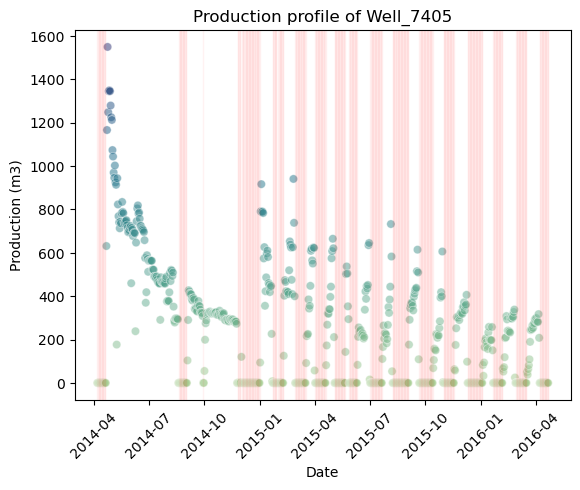

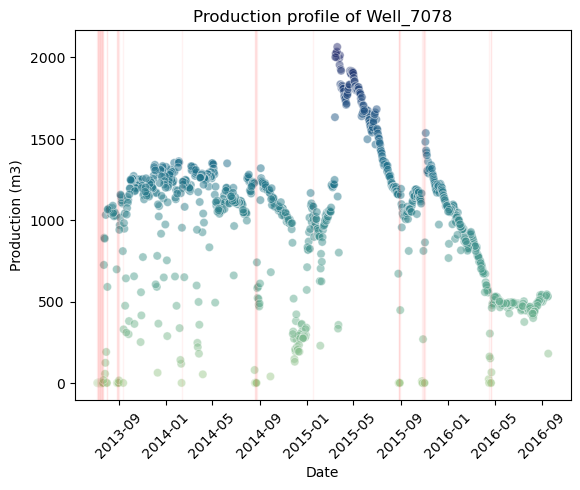

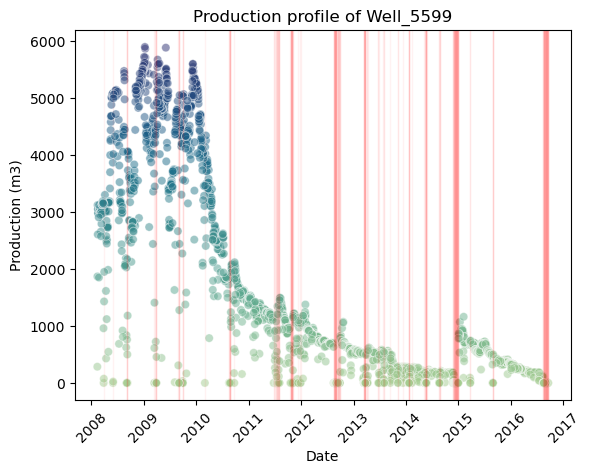

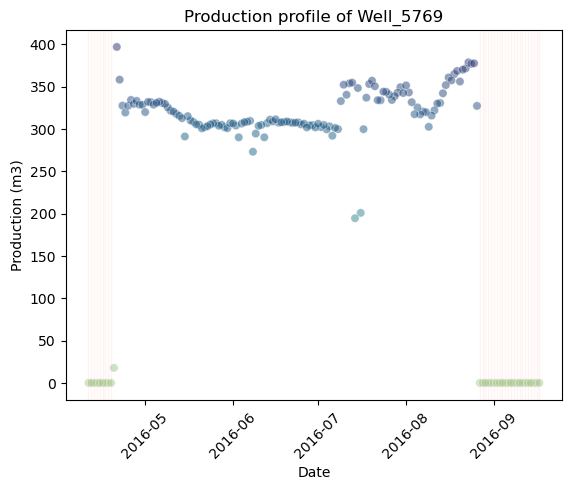

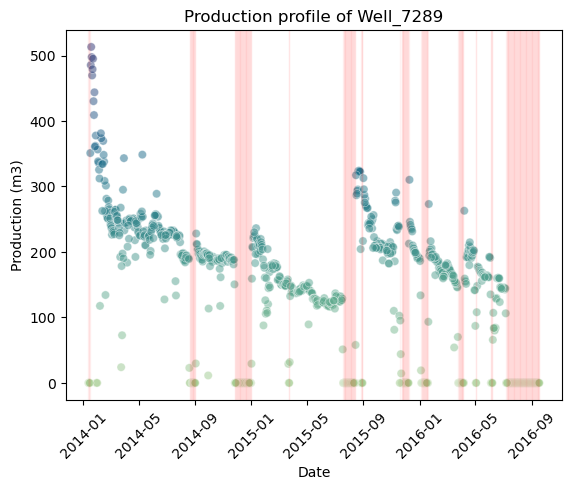

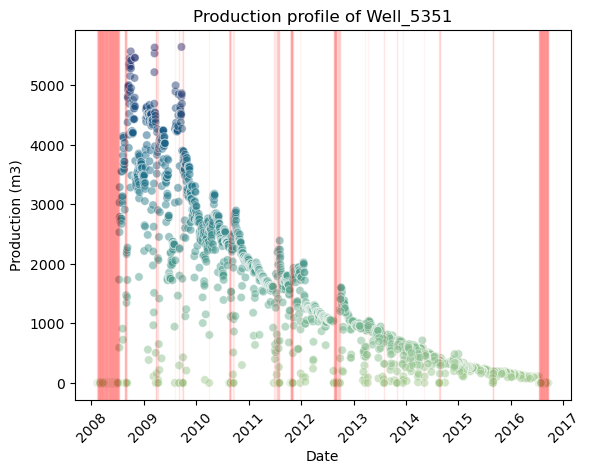

In [173]:
# Visualizing the production profile of all the wells...

for (well, df) in zip(well_df_dict.keys(), well_df_dict.values()):
    df_nf_dates = df[df.ON_STREAM_HRS == 0]["DATEPRD"]
    fig, ax_1 = plt.subplots()
    ax_1 = sns.scatterplot(x = df.DATEPRD, y = df.BORE_OIL_VOL, hue = df.BORE_OIL_VOL, 
                           palette = "crest", alpha = 0.5, legend = False)
    plt.xticks(rotation = 45)
    for date in df_nf_dates:
        ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    ax_1.set(title = f"Production profile of Well_{well}", xlabel = "Date", ylabel = "Production (m3)")
    fig_save(fig, f"Production profile of Well_{well}")

After cisualizing the production profiles for all the wells, we choose the well 5351 for building our model as it has:
1. large number of sample points taken over a long period of time, and
2. its production follows the typical declining production trend seen in a typical oil well

In [297]:
df_5351 = well_df_dict[5351].copy()

# Cleaning the Dataset

In [298]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 215.0 KB


AVG_CHOKE_SIZE_P feature has 196 nan values. We'll drop the instances with no choke size values.

AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE both have 6 nan values within common instances. This is probably due to some sensor error as the production is non-zero in these instances. We'll also drop these instances.

In [299]:
## Removing Dates on which the well flowed for zero hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)

## Removing Dates on which the well produced zero m3 oil from the dataset
df_5351.drop(index = list(df_5351[df_5351.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)

## Removing Instances with null values in CHOKE Size and Downhole Pressure/Temp
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_CHOKE_SIZE_P)].index), axis = 0, inplace = True)
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_DOWNHOLE_PRESSURE)].index), axis = 0, inplace = True)

df_5351.reset_index(drop = True, inplace = True)

In [300]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2717 non-null   datetime64[ns]
 1   ON_STREAM_HRS             2717 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     2717 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2717 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2717 non-null   float64       
 5   AVG_WHP_P                 2717 non-null   float64       
 6   AVG_WHT_P                 2717 non-null   float64       
 7   DP_CHOKE_SIZE             2717 non-null   float64       
 8   BORE_OIL_VOL              2717 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 191.2 KB


In [301]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.050687,246.505180,101.647452,72.917002,43.807395,85.825170,13.757965,1443.872091
std,3.438220,25.077625,8.742068,27.658527,18.125673,5.836733,16.542586,1288.453491
min,0.625000,0.000000,0.000000,2.485842,0.000000,12.134665,1.450701,4.300000
25%,24.000000,240.602292,99.873083,44.923847,31.499809,85.357485,2.616243,330.840000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000
max,25.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000


In [302]:
## Some data points have ON_STREAM_HRS > 24...setting them to 24

for index in df_5351[df_5351.ON_STREAM_HRS > 24].index:
    df_5351.loc[index, "ON_STREAM_HRS"] = 24

In [303]:
## Since the Well head Pressure can't be zero for non-zero oil production, we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_WHP_P <= 1].index, "AVG_WHP_P"] = df_5351.AVG_WHP_P.median()

## Similarly, since the Downhole Pressure and Temperature can't be zero for non-zero oil production, 
## we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_PRESSURE == 0].index, "AVG_DOWNHOLE_PRESSURE"] = df_5351.AVG_DOWNHOLE_PRESSURE.median()
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_TEMPERATURE == 0].index, "AVG_DOWNHOLE_TEMPERATURE"] = df_5351.AVG_DOWNHOLE_TEMPERATURE.median()

In [304]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.049285,247.869875,102.209370,72.917002,43.845806,85.825170,13.757965,1443.872091
std,3.437653,17.071416,4.364058,27.658527,18.069896,5.836733,16.542586,1288.453491
min,0.625000,49.450440,20.959721,2.485842,27.185420,12.134665,1.450701,4.300000
25%,24.000000,240.886223,99.887850,44.923847,31.508247,85.357485,2.616243,330.840000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000
max,24.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000


In [305]:
## Sorting the values in ascending order wrt the date column

df_5351 = df_5351.sort_values(["DATEPRD"])
df_5351.reset_index(inplace = True, drop = True)

In [342]:
## Saving the cleaned 5351 well production data to excel file
working_df_path = dataset_path.parent / "working_df.xlsx"
df_5351.to_excel(str(working_df_path), index = False)  ##index = False doesn't save the index

In [343]:
df = pd.read_excel(working_df_path)
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
0,2008-07-13,24.00,260.866875,103.292880,21.052993,100.714919,52.381899,69.539413,1735.26
1,2008-07-14,5.57,256.248230,104.017718,27.223459,99.598318,71.115352,68.016167,592.36
2,2008-07-15,24.00,254.982785,103.967009,27.277954,98.649941,67.590753,66.948884,2532.21
3,2008-07-16,24.00,251.475921,104.210557,30.650552,95.658734,73.782251,63.663812,3030.71
4,2008-07-17,24.00,249.346191,104.339184,32.562537,93.585252,78.035440,61.337700,3288.08


In [344]:
## Defining a function to plot the Date vs Production chart
def date_vs_prod(df, nf_plot = False):
    fig, ax_1 = plt.subplots()
    sns.scatterplot(data = df, x = "DATEPRD", y = "BORE_OIL_VOL", hue = "BORE_OIL_VOL", alpha = 0.5, size = 5, ax = ax_1,
                   legend = False, palette="crest")
    if nf_plot:
        nf_dates = df[df.ON_STREAM_HRS == 0]
        nf_dates = nf_dates.iloc[:,0].values
        for date in nf_dates:
            ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    return fig

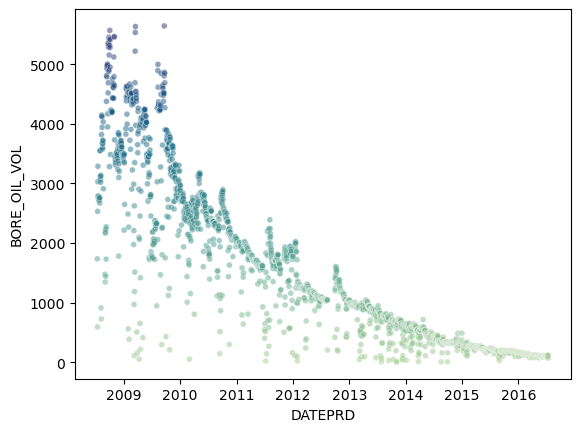

In [345]:
## Testing the above function
plot = date_vs_prod(df)

Now our data looks ready for EDA :{)

Separating the training dataset...to perform EDA and train the model.

## EDA

In [346]:
# #Training dataset is taken to be all the data points before after April 2013 and before June 2015.
# # Validation and testing dataset is taken to be all the data points after June 2015

# df_5351_train = df_5351[(df_5351.DATEPRD >= pd.to_datetime("04/01/2013")) & (df_5351.DATEPRD < pd.to_datetime("06/01/2015"))]
# df_5351_val_test = df_5351[df_5351.DATEPRD >= pd.to_datetime("06/01/2015")]

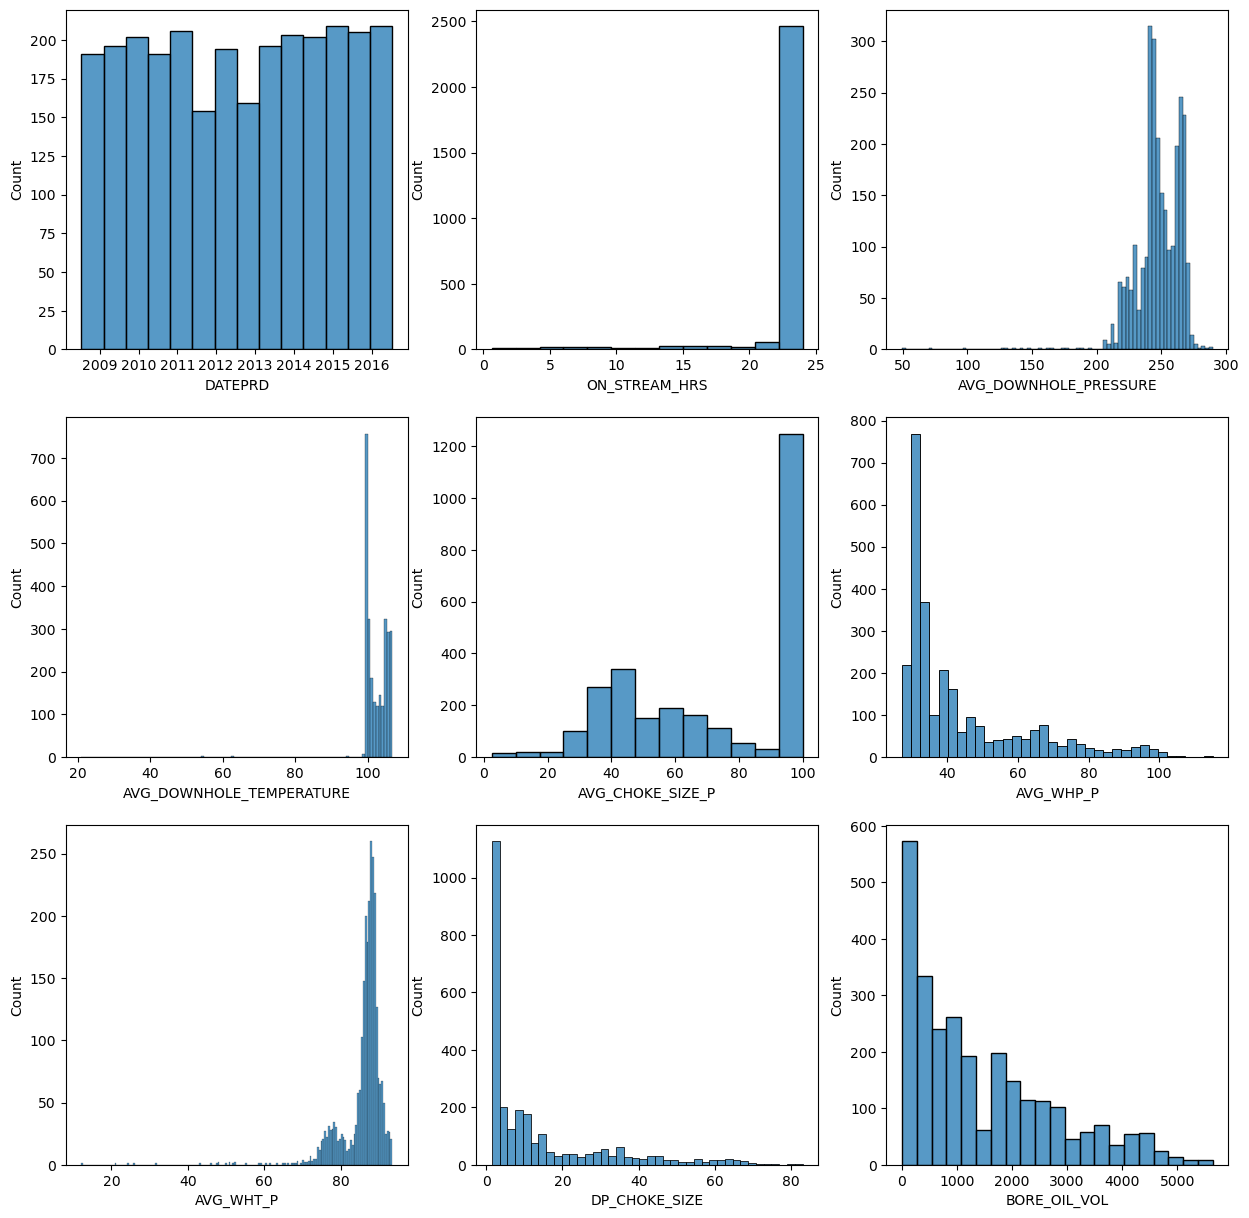

In [347]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns)
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.histplot(data=df, x = col, ax = axis)

C:\Users\spect\AppData\Local\Temp\ipykernel_1368\534679436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


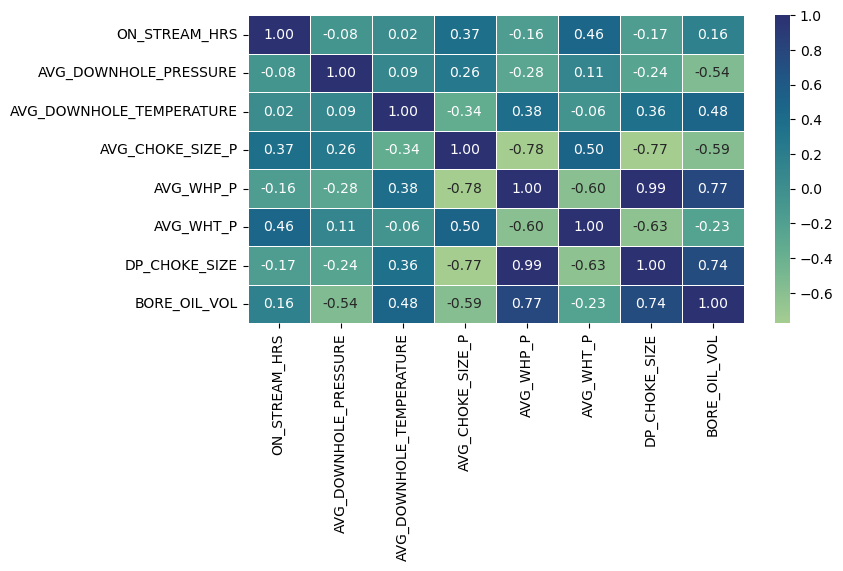

In [348]:
corr_matrix = df.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(corr_matrix, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

The above boxplot shows that Wellhead Pressure is highly positively correlated to Oil Production, which is to be expected. 

Also, Wellhead Pressure is very highly positively correlated to DP Choke Size, which is also to be expected. 

Also, DP Choke Size is negatively correlated to AVG Choke SIZE P which is also expected.

---

One interesting observation is that Well Head Temperature is not correlated with Downhole Temperature. Reasons for this are as follows:

The wellhead temperature of an oil well will be somewhat less than the BHT. The amount of cooling as crude flows to the surface will depend on several factors:

1. The relative amounts of oil and water
2. The specific heats of oil and water
3. The flow rate, the gas/liquid ratio
4. The vertical-flow pressure drop that controls the gas liberated and the attendant cooling effect, and the thermal heat transfer rate from the wellbore.

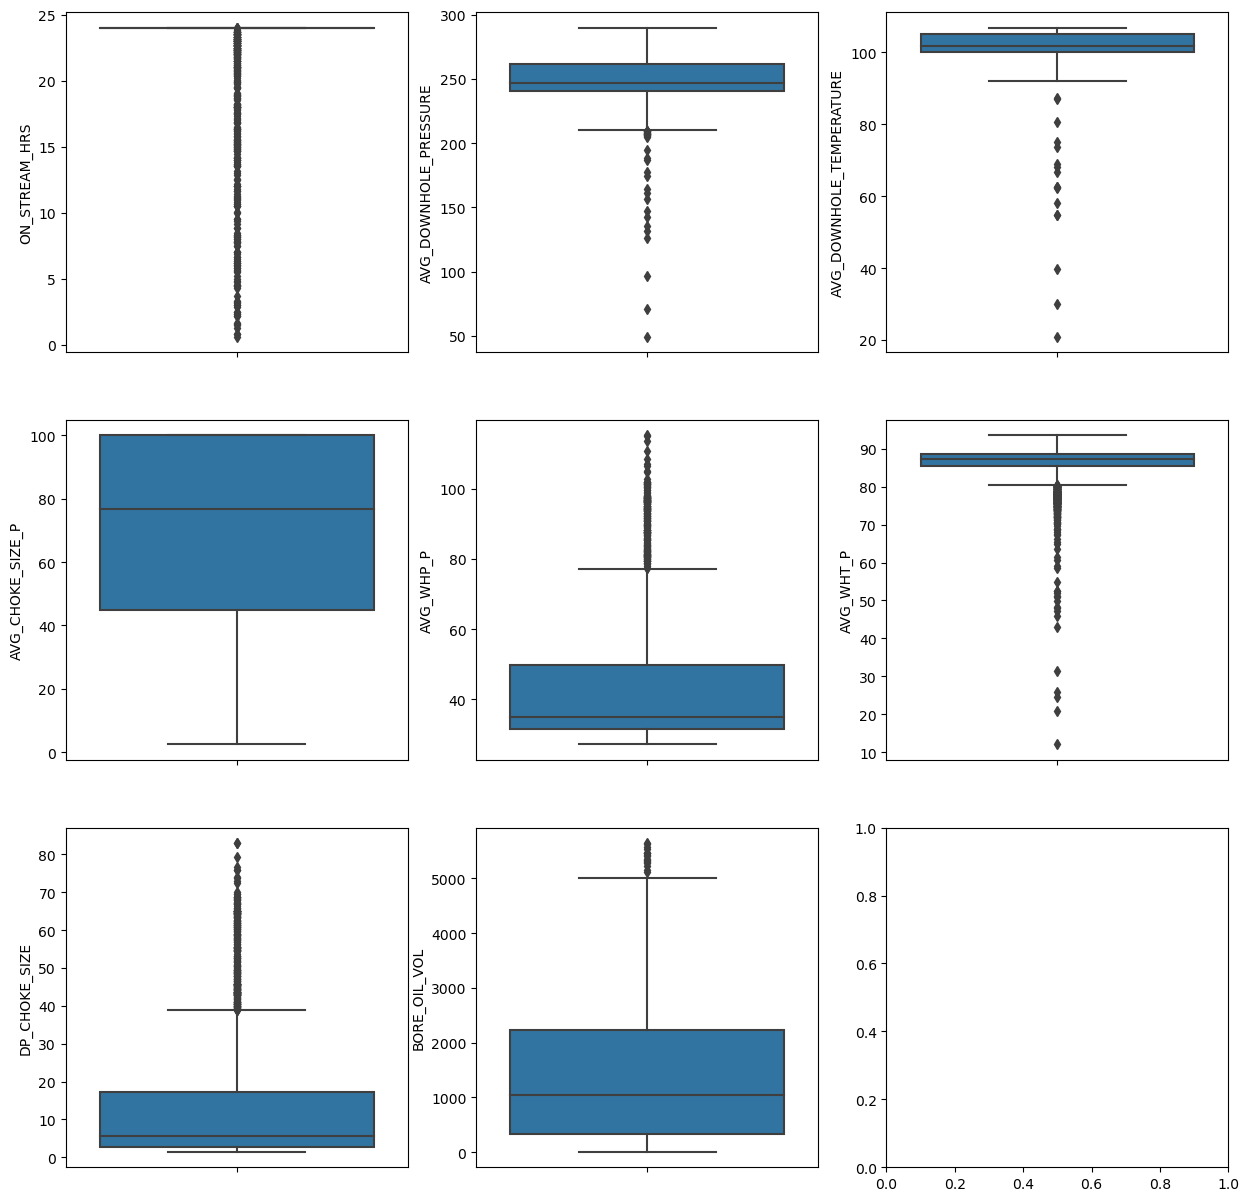

In [349]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns[1:])
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.boxplot(data=df, y = col, ax = axis)

Why are there so many values with low downhole temperatures? Is the well head temperature also low at those points? Do these points occur during the winters?

In [355]:
## Analysing the abnormally low values of downhole temperature (values less than 90 deg)

df_temp = df[(df.AVG_DOWNHOLE_TEMPERATURE < 100) & (df.AVG_DOWNHOLE_PRESSURE < 220)]
df_temp

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
311,2009-06-15,13.60833,204.891693,96.998262,33.790855,69.501117,72.837203,37.502203,1724.89


From the above table, it is observed that the low values of downhole temperature coexists with low values of downhole pressure. This indicates erroneous values being produced by the downhole equipment measuring the downhole pressure and temperature. Therefore, we are going to replace these values with median values.

In [356]:
## Replacing the outliers in Downhole Pressure and Downhole Temperature with their medians

temp_median = df["AVG_DOWNHOLE_TEMPERATURE"].median()
press_median = df["AVG_DOWNHOLE_PRESSURE"].median()
df["AVG_DOWNHOLE_TEMPERATURE"] = df.AVG_DOWNHOLE_TEMPERATURE.apply(lambda temp: temp_median if temp < 100 else temp)
df["AVG_DOWNHOLE_PRESSURE"] = df.AVG_DOWNHOLE_PRESSURE.apply(lambda press: press_median if press < 220 else press)

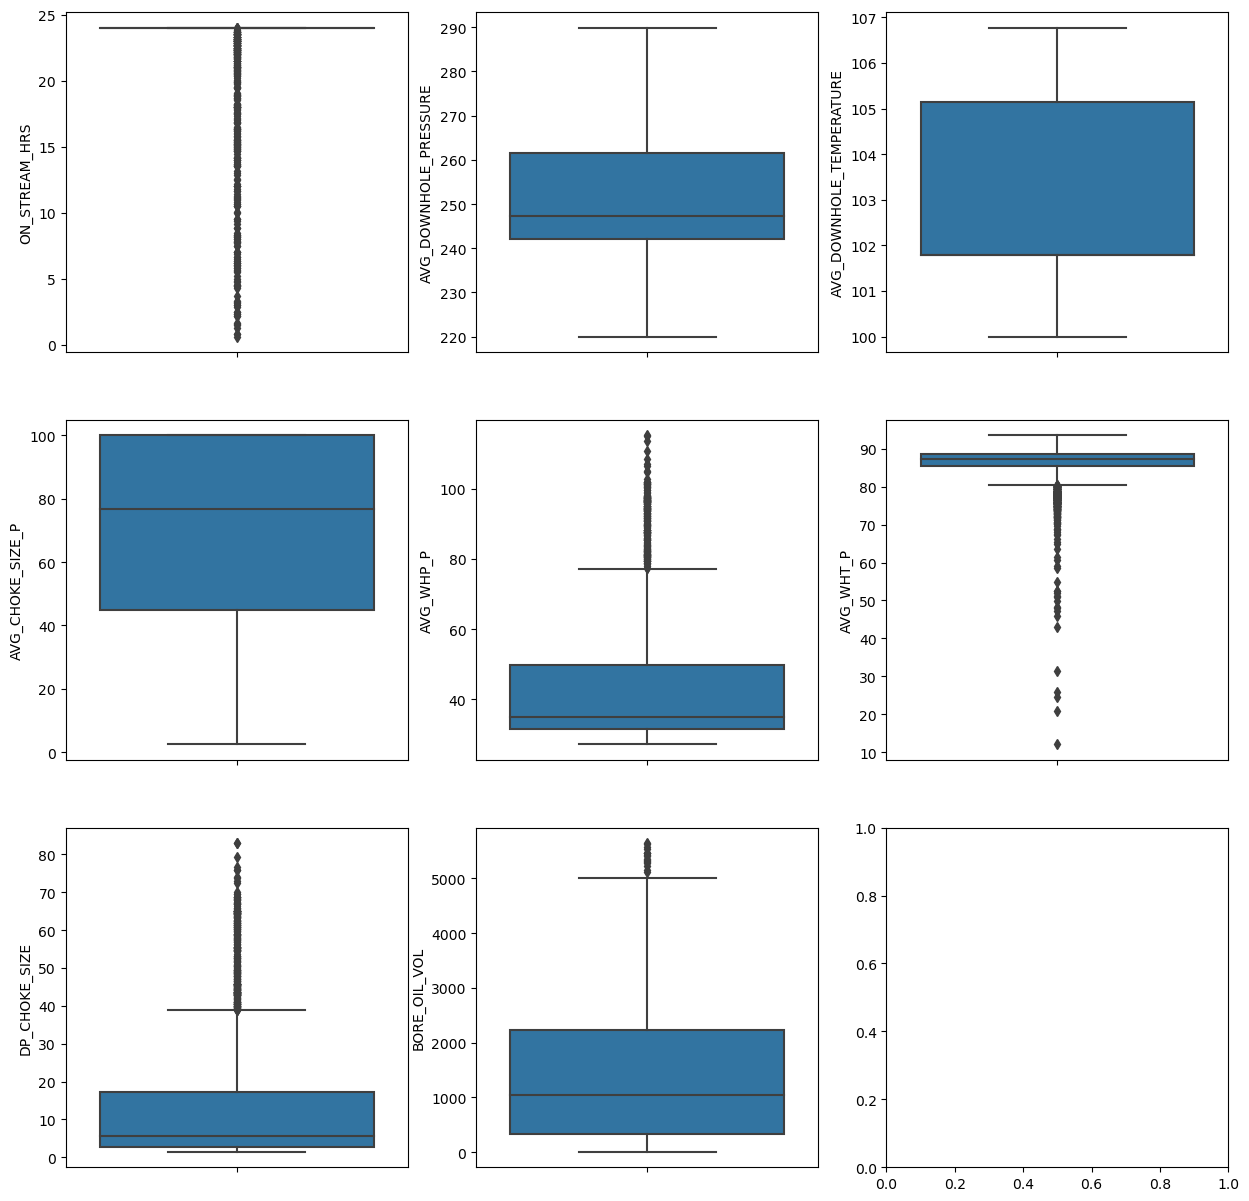

In [357]:
## Visualizing the ditribution of the features in the dataset again

cols = list(df.columns[1:])
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.boxplot(data=df, y = col, ax = axis)

***

Analysing the correlation between wellhead pressure and oil produced

<AxesSubplot: xlabel='AVG_WHP_P', ylabel='BORE_OIL_VOL'>

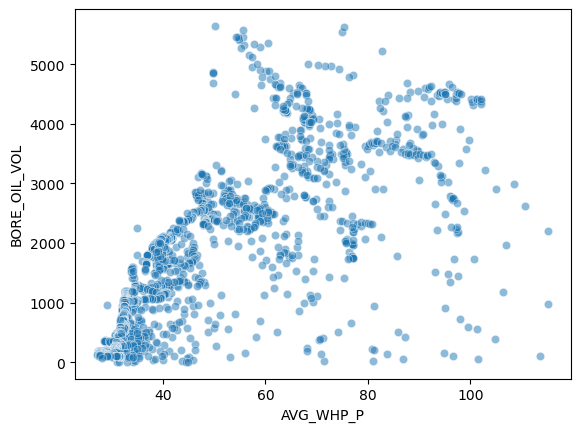

In [358]:
sns.scatterplot(x = df.AVG_WHP_P, y = df.BORE_OIL_VOL, alpha = 0.5)

Analysing Wellhead Pressure vs Oil Produced on yearwise basis for more in-depth analysis

In [396]:
df_temp = df
df_temp["Year"] = df_temp.DATEPRD.apply(lambda x: x.year)

In [397]:
years = np.unique(df_temp.Year)
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

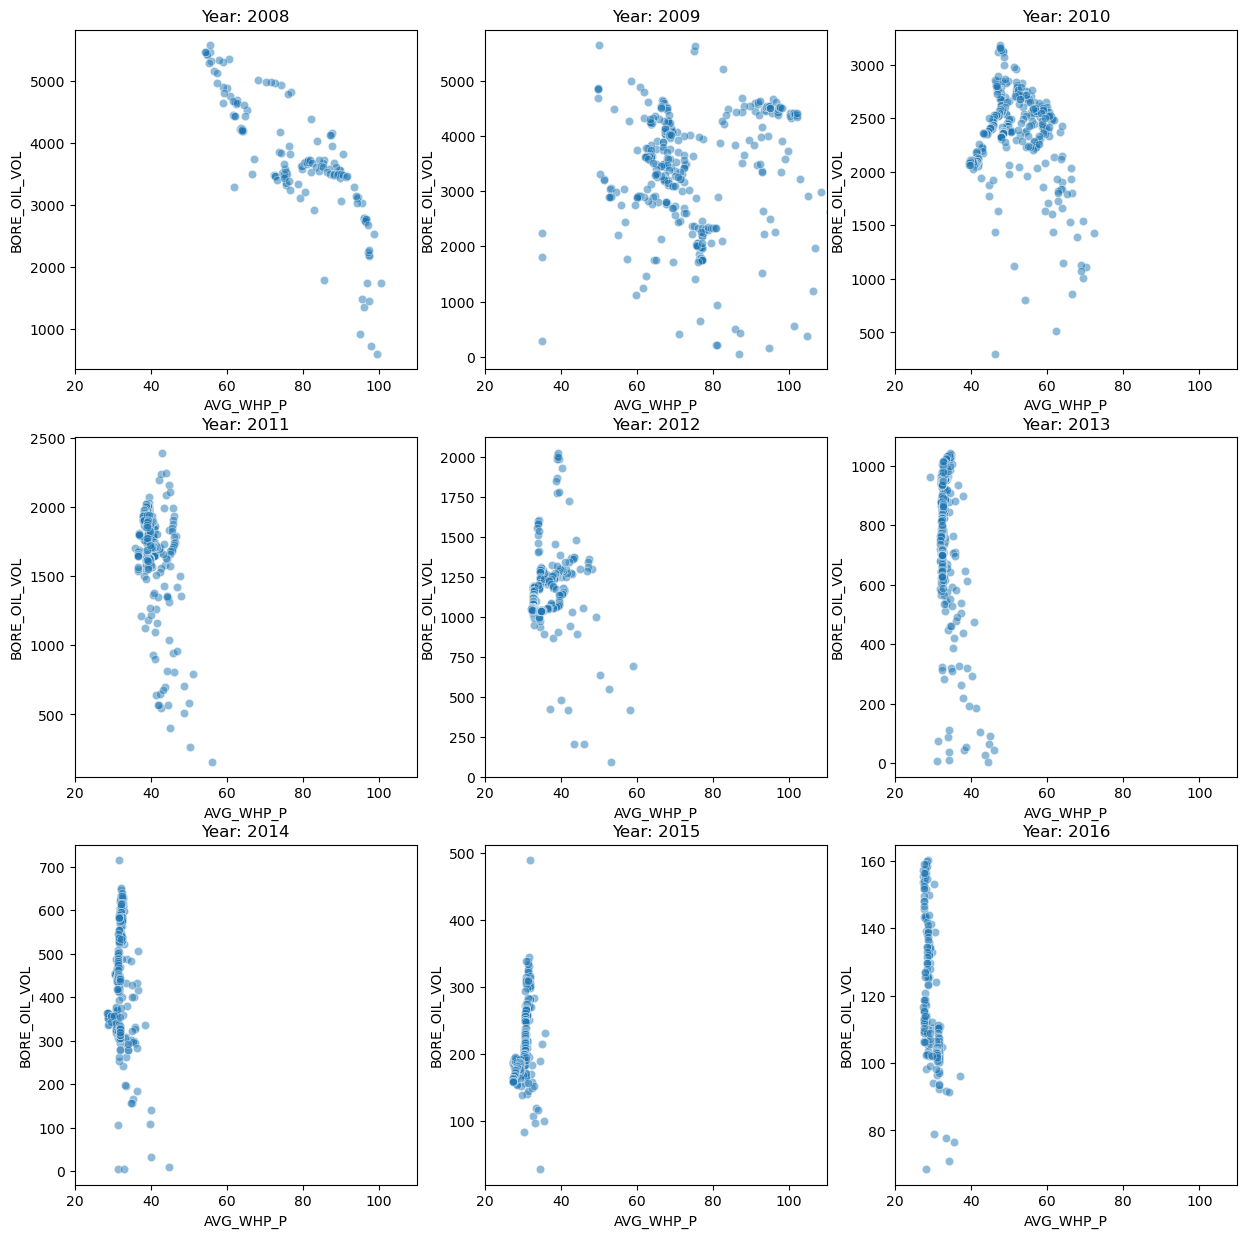

In [398]:
fig, ax = plt.subplots(nrows = 3, ncols= 3, figsize = (15,15))
for (year, axis) in zip(years, ax.ravel()):
    df_year = df_temp[df_temp.Year == year]
    sns.scatterplot(data = df_year, x = "AVG_WHP_P", y = "BORE_OIL_VOL", alpha = 0.5, ax=axis, )
    axis.set(title = f"Year: {year}", xlim = [20, 110])

From the above plots, we can see that the high wellhead pressure datapoints (>80) mostly lie in the year 2008-09 plots, when the well was young, and producing high volumes of oil. As the time has progressed, the oil volume has also decreased alongwith the wellhead pressure. 

Considering the above plots, we can remove all the points with wellhead pressure greater than 80 after 2010 and greater than 60 after 2011.

In [399]:
## Implementing the above observations and removing the outliers in Wellhead Pressure values

df["Year"] = df.DATEPRD.apply(lambda x: x.year)
df = df[(df.Year <= 2009) | 
        ((df.Year == 2010) & (df.AVG_WHP_P < 80)) |
        ((df.Year > 2010) & (df.AVG_WHP_P < 60))]

df.drop(columns = ["Year"], inplace = True, axis = 1) ## Dropping the Year column again as its no longer needed

C:\Users\spect\AppData\Local\Temp\ipykernel_1368\433344667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df.DATEPRD.apply(lambda x: x.year)


***

# Modelling

### Preparing a function to apply all the pre-processing steps in a single go

In [14]:
def preprocessor(df_, train_start_date, val_date, test_date, 
                 Day_col = True, Month_col = True, Year_col = True, scale = True):
    
    # Creating a copy of the passed dataset so that the original dataset is not modified
    df = df_.copy()
    
    ## Removing Dates on which the well flowed for zero hours from the dataset
    df.drop(index = list(df[df.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Dropping the date points where the oil volume produced is equal to zero
    df.drop(index = list(df[df.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Some data points have ON_STREAM_HRS > 24...setting them to 24
    for index in df[df.ON_STREAM_HRS > 24].index:
        df.loc[index, "ON_STREAM_HRS"] = 24
    
    # Breaking the DATEPRD column into Day, Month and Year columns
    if Day_col:
        df["Day"] = df.DATEPRD.dt.day
    if Month_col:
        df["Month"] = df.DATEPRD.dt.month
    if Year_col:
        df["Year"] = df.DATEPRD.dt.year
        

    # Training dataset is taken to be all the data points after train_start_date and before val_date
    # Validation and testing dataset is taken to be all the data points after val_date
    df_train = df[(df.DATEPRD >= pd.to_datetime(train_start_date)) & (df.DATEPRD < pd.to_datetime(val_date))].copy()
    df_val_test = df[df.DATEPRD >= pd.to_datetime(val_date)].copy()
    
    ##_______ TO BE DONE AFTER SEPERATING TRAIN DATASET _________
    
    ## Replacing the zero/na values in downhole pressure and temperature with the mean values
    dhp_mean = df_train["AVG_DOWNHOLE_PRESSURE"].mean()
    dht_mean = df_train["AVG_DOWNHOLE_TEMPERATURE"].mean()

    for df_ in [df_train, df_val_test]:
        dhp_index = df_[(df_.AVG_DOWNHOLE_PRESSURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index
        dht_index = df_[(df_.AVG_DOWNHOLE_TEMPERATURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index

        for index in dhp_index:
            df_.loc[index, "AVG_DOWNHOLE_PRESSURE"] = dhp_mean

        for index in dht_index:
            df_.loc[index, "AVG_DOWNHOLE_TEMPERATURE"] = dht_mean
    
    ## Removing outliers from the features in the training datset
    df_train = df_train[
        (df_train.AVG_DOWNHOLE_PRESSURE > 200) &
        (df_train.AVG_DOWNHOLE_TEMPERATURE > 90) &
        (df_train.AVG_WHP_P != 0) &
        (df_train.AVG_WHP_P < 80) &
        (df_train.AVG_WHT_P > 70) &
        (df_train.DP_CHOKE_SIZE < 70)
    ]
    
    # Creating X_train, y_train, X_val, y_val, X_test, y_test
    # Validation data is taken to be data points from val_date till test_date
    # Test data is taken to be data points from test_date till the last available date
    features_list = list(df_train.columns)
    features_list.remove("BORE_OIL_VOL")

    y_train = df_train["BORE_OIL_VOL"]
    X_train = df_train.loc[:,features_list]

    df_val = df_val_test[df_val_test.DATEPRD < pd.to_datetime(test_date)]
    df_test = df_val_test[df_val_test.DATEPRD >= pd.to_datetime(test_date)]

    y_val = df_val["BORE_OIL_VOL"]
    X_val = df_val.loc[:,features_list]

    y_test = df_test["BORE_OIL_VOL"]
    X_test = df_test.loc[:,features_list]
    
    # Dropping DATEPROD col
    for df_ in [X_train, X_val, X_test]:
        df_.drop(["DATEPRD"], axis = 1, inplace = True)
    
    print(f" Features in the output datasets: {list(X_train.columns)}")
    
    # Scaling the data using StandardScaler from sklearn
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    # Printing the length of X_train, X_val and X_test datasets
    for X_name, X_df in zip(["Train", "Validation", "Test"], [X_train, X_val, X_test]):
        print(f"Data points in {X_name} are: {len(X_df)}")
    
    return (X_train, y_train, X_val, y_val, X_test, y_test)

## Testing the above preprocessing function 

# (X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df_5351, train_start_date="04/01/2013",
#                                                              val_date = "06/01/2015", test_date = "01/01/2016")

In [15]:
## Function for plotting predicted values vs actual values

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("plasma")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual values")
    ax.set_ylabel("Predicted values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()

### Preparing the data and trying non-time series models (linear, SVM, ensembles, NN)

In [80]:
(X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df_5351, train_start_date="04/01/2013",
                                                             val_date = "06/01/2015", test_date = "01/01/2016",
                                                               Day_col = False, Month_col = False, Year_col = False)

 Features in the output datasets: ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
Data points in Train are: 758
Data points in Validation are: 210
Data points in Test are: 195


## 1. Trying Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [340]:
mean_squared_error(rf.predict(X_val), y_val)

2814.216168410607

In [341]:
mean_squared_error(y_train, rf.predict(X_train))

2562.406833533967

Such a significant difference in the mean squared error between training predictions and validation predictions signifies that the Random Forest model is overfitting

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


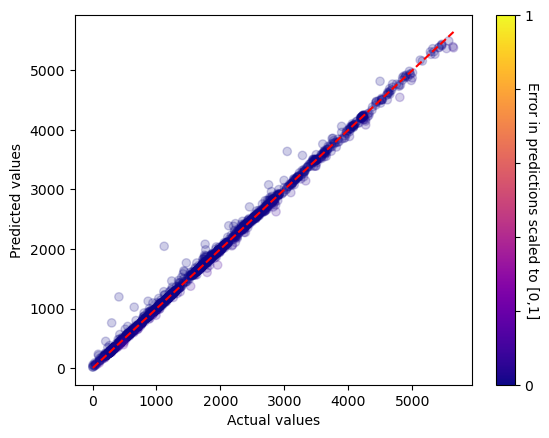

In [342]:
predict_plot(y_train, rf.predict(X_train))

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


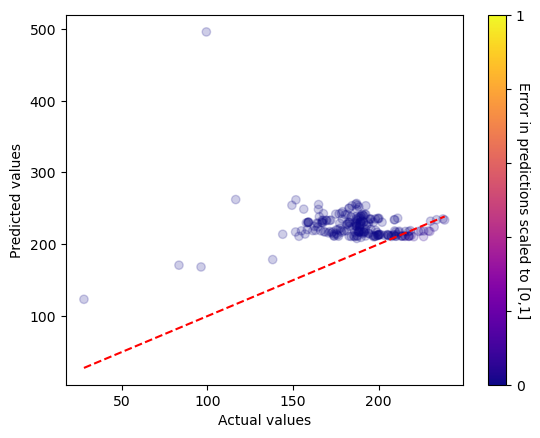

In [343]:
predict_plot(y_val, rf.predict(X_val))

(array([ 1.,  0.,  1.,  2.,  1.,  6., 40., 96., 45., 18.]),
 array([ 27.78 ,  48.867,  69.954,  91.041, 112.128, 133.215, 154.302,
        175.389, 196.476, 217.563, 238.65 ]),
 <BarContainer object of 10 artists>)

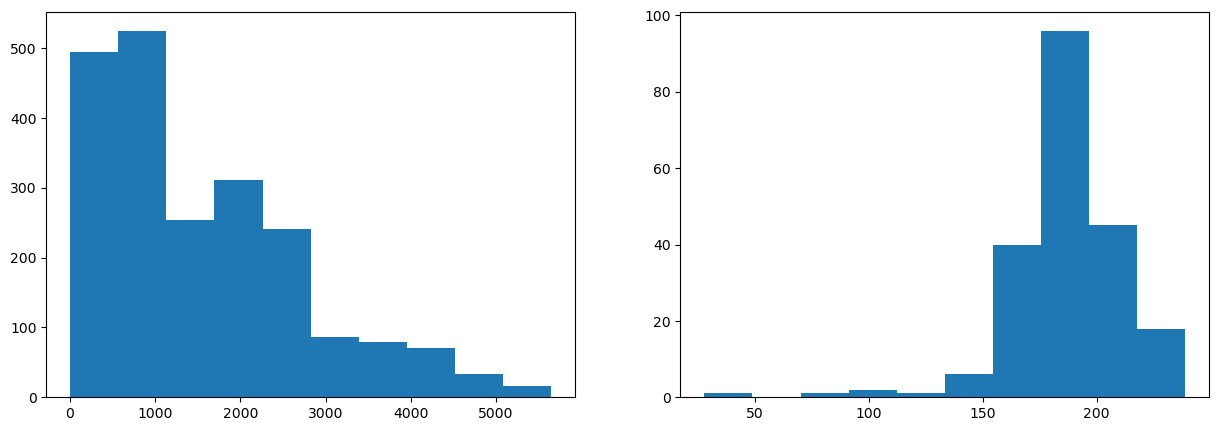

In [344]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(y_train)
ax[1].hist(y_val)

Feature importance in the Random Forest Model

<AxesSubplot: >

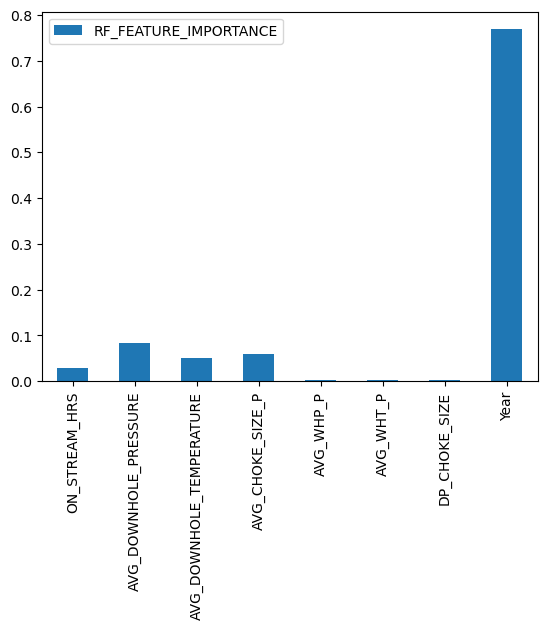

In [346]:
rf_fi = rf.feature_importances_
features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'Year']
df_fi = pd.DataFrame(data = rf_fi, index = features, columns=["RF_FEATURE_IMPORTANCE"])
df_fi.plot.bar()

## 2. Trying SVM

### 2.1 SVM RBF Kernel

In [347]:
from sklearn.svm import SVR
svr = SVR(C = 10^6, epsilon = 6)
svr.fit(X_train, y_train)

SVR(C=12, epsilon=6)

In [348]:
mean_squared_error(y_val, svr.predict(X_val))

19645.95421579414

In [349]:
mean_squared_error(y_train, svr.predict(X_train))

243257.80575753644

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


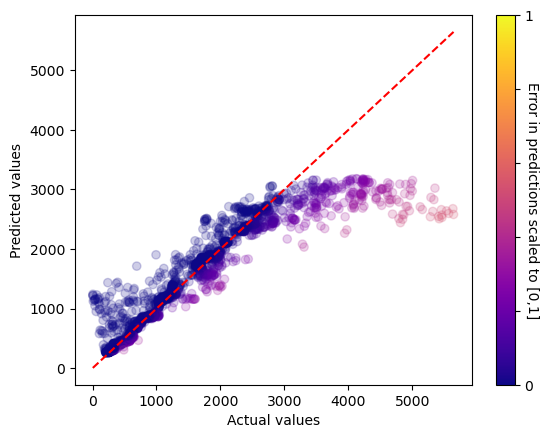

In [350]:
predict_plot(y_train, svr.predict(X_train))

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


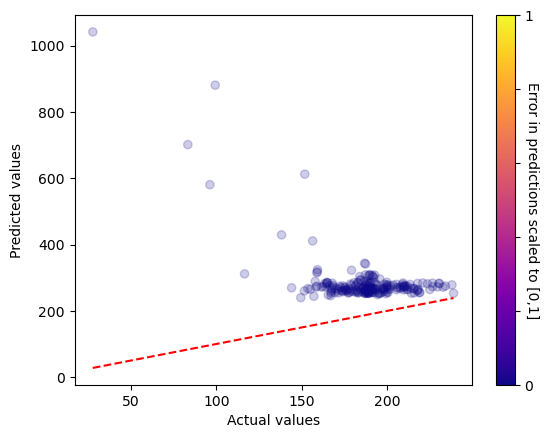

In [351]:
predict_plot(y_val, svr.predict(X_val))

### 2.2 SVM Poly kernel

Degree = 3

In [352]:
from sklearn.svm import SVR
svm_poly_3 = SVR(kernel = "poly", degree = 10, C=10^6, epsilon = 0.1)
svm_poly_3.fit(X_train, y_train)

SVR(C=12, degree=10, kernel='poly')

In [353]:
mean_squared_error(y_val, svm_poly_3.predict(X_val))

945831.5893041723

In [354]:
mean_squared_error(y_train, svm_poly_3.predict(X_train))

541714.7631652423

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


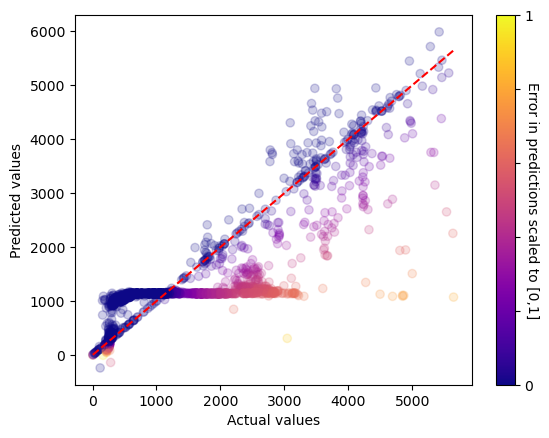

In [355]:
predict_plot(y_train, svm_poly_3.predict(X_train))

## 3. Neural Networks

In [71]:
X_train.shape

(758, 8)

In [72]:
y_train.shape

(758,)

In [37]:
## Trying MLP lyers from scikit-learn

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor([10000,5000,2000,1000,100,10,1], max_iter = 1000)
mlp_reg.fit(X_train, y_train)

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=[10000, 5000, 2000, 1000, 100, 10, 1],
             max_iter=1000)

In [39]:
mean_squared_error(y_val, mlp_reg.predict(X_val))

35336.603086981275

In [40]:
mean_squared_error(y_train, mlp_reg.predict(X_train))

KeyboardInterrupt: 

In [76]:
dense_nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = X_train.shape[1:]),
    keras.layers.Dense(2000, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1500, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1000, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(700, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(400, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1, activation = "relu")
])
dense_nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 2000)              18000     
                                                                 
 dense_65 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_66 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_67 (Dense)            (None, 700)               700700    
                                                                 
 dense_68 (Dense)            (None, 400)               280400    
                                                                 
 dense_69 (Dense)            (None, 200)               80200     
                                                                 
 dense_70 (Dense)            (None, 100)              

In [77]:
## Tensorboard utility time function
import os
import time

def tensorboard_dir_gen():
    root_dir = os.path.join(os.curdir, "my_logs")
    curr_time = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    curr_dir = os.path.join(root_dir, curr_time)
    return curr_dir

In [78]:
dense_nn.compile(optimizer = keras.optimizers.SGD(), loss = "mean_squared_error")
# early_stopping = keras.callbacks.EarlyStopping(patience = 50, monitor = "val_loss")
# tensorboard_callback = keras.callbacks.TensorBoard(tensorboard_dir_gen())
history = dense_nn.fit(X_train, y_train, epochs = 50
#                        ,callbacks = [early_stopping, tensorboard_callback]
                      )

Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 204171193509999701655552.0000
Epoch 2/50
24/24 [==============================] - 0s 19ms/step - loss: 296675.7500
Epoch 3/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 4/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 5/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 6/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 7/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 8/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 9/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 10/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 11/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 12/50
24/24 [==========================

In [379]:
X_train

array([[ 0.27079429,  0.39578247, -1.00925478, ..., -0.14665896,
        -0.7770423 ,  0.6411951 ],
       [ 0.27079429, -2.16757159, -0.15234888, ..., -1.40967338,
        -0.63693635,  0.13252811],
       [ 0.27079429, -0.30289548, -0.50561004, ...,  0.24220205,
        -0.56931699,  0.13252811],
       ...,
       [ 0.27079429,  1.54771727, -1.31691491, ...,  0.09833602,
        -0.58333477,  1.14986209],
       [ 0.06002342,  1.72465943, -1.3229508 , ..., -0.42882352,
        -0.47668078,  1.14986209],
       [ 0.27079429, -1.03975745, -0.31456211, ..., -0.60328929,
        -0.75090469,  0.13252811]])

In [370]:
X_val.shape

(210, 8)

## 4. RNN's 

In [79]:
X_train

array([[ 0.26903972, -0.89826773,  0.41537521, ..., -0.55674141,
        -0.18189645, -1.19724647],
       [-0.43664195, -1.84402633,  1.98403524, ...,  0.48036798,
         1.59641776, -1.19724647],
       [ 0.26903972, -1.64550805,  1.64909637, ...,  0.7905657 ,
         0.31658432, -1.19724647],
       ...,
       [ 0.26903972,  0.75129244, -0.99981638, ...,  0.1816398 ,
        -0.67255329,  0.19251283],
       [ 0.26903972,  1.17200014, -1.05668267, ..., -0.08823194,
         1.26432722,  0.19251283],
       [ 0.06523142,  1.49000221, -1.08556253, ..., -1.09633111,
         2.06060776,  0.19251283]])

In [ ]:
rnn_model = keras.models.Sequential([
    keras.layers.
])